In [1]:
import numpy as np # Array computing
import pandas as pd # Data structure
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Data visualization
from sklearn.metrics import recall_score, precision_score

# Read the data
df = pd.read_csv("../res/data/data.csv")

In [2]:
# 1) Quick look at the data structure

# 1.1) Get insights

# First 5 rows of data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Columns of the dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
# Statistic about the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Dimensionality of the dataset
df.shape

(569, 33)

In [6]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
# Histogram of all features
#%matplotlib inline
#data.hist(bins=50, figsize=(20, 15))
#plt.show()

In [8]:
# 1.2) Discover and visualize the data

In [9]:
# 1.3) Look for correlations between features (not target) for feature selection/extraction

In [10]:
# 1.4) Attribute combinations

In [11]:
# 2) Prepare the data for ML algorithms

# 2.1) Categorical variables conversion and data cleaning
# Convert diagnosis (B(enign)=0, M(alignant)=1) (before dividing features from labels)
df["diagnosis"] = df["diagnosis"].astype('category').cat.codes

# Remove useless columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [12]:
# 2.2) Feature scaling
# TODO

In [13]:
# 2.3) Train/test set creation

# Divide features from labels
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

# Create a stratified train and test set
from sklearn.model_selection import train_test_split # sklearn: ML library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # 80% train set, 20% test set

In [14]:
# 2.4) Look for correlations with the target
corr_matrix = df.corr()
corr_matrix["diagnosis"].sort_values(ascending=False) # Correlation with the target

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [15]:
# 2.5) Custom trasformers and trasformation pipelines

In [16]:
# 3) Select and train a model
predictions = {}
metrics = {}
# specificity
# f_score
# cross_val_Score

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# ROC_AUC score
def roc_auc_for_model(model, X_test, y_test):
    probs = model.predict_proba(X_test)
    probs = probs[:, 1] # probs of positive class
    auc_s = roc_auc_score(y_test, probs)
    return auc_s, probs

# Plot the roc curve
def plot_roc_curve(name, fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig("../res/plots/roc_"+name+".png")
    plt.show()

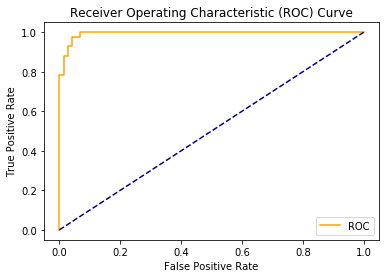

{'accuracy': 0.9385964912280702, 'recall': 0.8571428571428571, 'precision': 0.972972972972973, 'roc_auc': 0.9937169312169313}


In [18]:
#def plotDecisionBoundaries():

# 3.1) Logistic Regression
from sklearn.linear_model import LogisticRegression
model_name = "Logistic_Regression"
model = LogisticRegression(solver="liblinear") # liblinear ideal for small dataset
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions[model_name] = y_pred

auc_s, probs = roc_auc_for_model(model, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(model_name, fpr, tpr)

metrics[model_name] = {}
metrics[model_name]["accuracy"] = model.score(X_test, y_test)
metrics[model_name]["recall"] = recall_score(y_test, y_pred)
metrics[model_name]["precision"] = precision_score(y_test, y_pred)
metrics[model_name]["roc_auc"] = auc_s

print(metrics[model_name])

In [19]:
# cross_val_score
from sklearn.model_selection import cross_val_score
print("Cross validation score with several folds: ")
print(cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy"))

Cross validation score with several folds: 
[0.95652174 0.97826087 0.97826087 1.         0.95652174 0.93333333
 0.91111111 0.93333333 0.93333333 0.93333333]


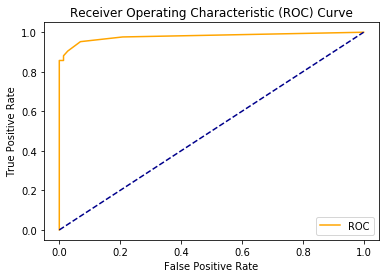

{'accuracy': 0.9473684210526315, 'recall': 0.8571428571428571, 'precision': 1.0, 'roc_auc': 0.9791666666666666}


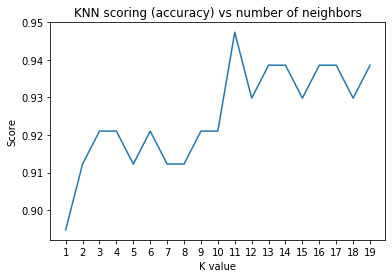

In [20]:
# 3.3) KNN Classification
from sklearn.neighbors import KNeighborsClassifier

def best_n_of_neighbors(neighbors, score_list, X_train, y_train, X_test, y_test):
    for i in range(1, neighbors):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        score_list.append(score)
    
    return score_list.index(max(score_list))+1

def knn_score_plot(neighbors, score_list):
    plt.plot(range(1, neighbors), score_list)
    plt.xticks(np.arange(1, neighbors, 1))
    plt.title('KNN scoring (accuracy) vs number of neighbors')
    plt.xlabel("K value")
    plt.ylabel("Score")
    plt.savefig("../res/plots/knn_neighbors.png")
    plt.show()

neighbors = 20
score_list = []
model_name = "K-Nearest_Neighbors"
model = KNeighborsClassifier(n_neighbors=best_n_of_neighbors(neighbors, score_list, X_train, y_train, X_test, y_test))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions[model_name] = y_pred

auc_s, probs = roc_auc_for_model(model, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(model_name, fpr, tpr)

metrics[model_name] = {}
metrics[model_name]["accuracy"] = model.score(X_test, y_test)
metrics[model_name]["recall"] = recall_score(y_test, y_pred)
metrics[model_name]["precision"] = precision_score(y_test, y_pred)
metrics[model_name]["roc_auc"] = auc_s

print(metrics[model_name])

knn_score_plot(neighbors, score_list)

In [21]:
# Grid search
from sklearn.model_selection import GridSearchCV
cv = 5

def grid_search(model, param_grid, cv):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train, y_train)
    #grid_search.best_params_
    print(grid_search.best_estimator_)
    #cvres = grid_search.cv_results_
    #for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    #    print(np.sqrt(-mean_score), params)
    

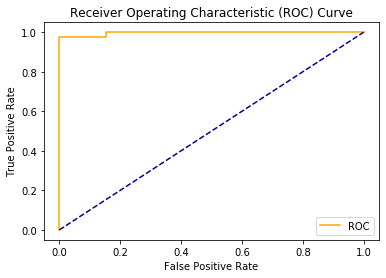

{'accuracy': 0.9824561403508771, 'recall': 0.9523809523809523, 'precision': 1.0, 'roc_auc': 0.9963624338624338}


In [22]:
# 3.4.2) SVM with feature scaling and grid search
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model_name = "Support-Vector_Machines_scaling_grid"
model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="linear", C=0.1, probability=True)) # Alternatives: LinearSVC(C=0.1, loss="hinge", max_iter=5000) [need of the CalibratedClassifier for proba, but faster than SVC with linear kernel], SGDClassifier(loss="hinge", alpha=1/(m*C))
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions[model_name] = y_pred

auc_s, probs = roc_auc_for_model(model, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(model_name, fpr, tpr)

metrics[model_name] = {}
metrics[model_name]["accuracy"] = model.score(X_test, y_test)
metrics[model_name]["recall"] = recall_score(y_test, y_pred)
metrics[model_name]["precision"] = precision_score(y_test, y_pred)
metrics[model_name]["roc_auc"] = auc_s

print(metrics[model_name])

In [23]:
# Grid search for SVM
param_grid = [
    {'svc__C': [0.1, 0.2, 0.4, 0.6, 0.8, 1]} # lsvc name in the pipeline, double underscore means to selet that parameter annotated after it
]

grid_search(model, param_grid, cv)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


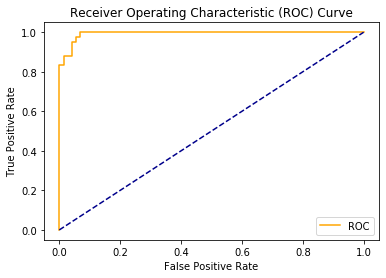

{'accuracy': 0.9385964912280702, 'recall': 0.8333333333333334, 'precision': 1.0, 'roc_auc': 0.9933862433862434}


In [24]:
# 3.5) Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_name = "Naive_Bayes"
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions[model_name] = y_pred

auc_s, probs = roc_auc_for_model(model, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(model_name, fpr, tpr)

metrics[model_name] = {}
metrics[model_name]["accuracy"] = model.score(X_test, y_test)
metrics[model_name]["recall"] = recall_score(y_test, y_pred)
metrics[model_name]["precision"] = precision_score(y_test, y_pred)
metrics[model_name]["roc_auc"] = auc_s

print(metrics[model_name])

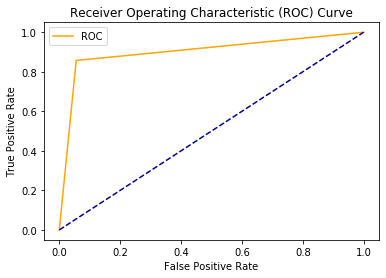

{'accuracy': 0.9122807017543859, 'recall': 0.8571428571428571, 'precision': 0.9, 'roc_auc': 0.9007936507936508}


In [25]:
# 3.6) Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_name = "Decision_Tree"
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions[model_name] = y_pred

auc_s, probs = roc_auc_for_model(model, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(model_name, fpr, tpr)

metrics[model_name] = {}
metrics[model_name]["accuracy"] = model.score(X_test, y_test)
metrics[model_name]["recall"] = recall_score(y_test, y_pred)
metrics[model_name]["precision"] = precision_score(y_test, y_pred)
metrics[model_name]["roc_auc"] = auc_s

print(metrics[model_name])

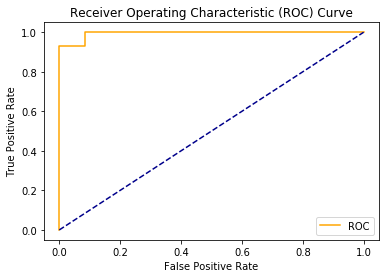

{'accuracy': 0.9736842105263158, 'recall': 0.9285714285714286, 'precision': 1.0, 'roc_auc': 0.994047619047619}


In [26]:
# 3.7.2) Random Forest with grid search
from sklearn.ensemble import RandomForestClassifier
model_name = "Random_Forest_grid"
model = RandomForestClassifier(bootstrap=False, max_features=6, n_estimators=100, warm_start=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions[model_name] = y_pred

auc_s, probs = roc_auc_for_model(model, X_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(model_name, fpr, tpr)

metrics[model_name] = {}
metrics[model_name]["accuracy"] = model.score(X_test, y_test)
metrics[model_name]["recall"] = recall_score(y_test, y_pred)
metrics[model_name]["precision"] = precision_score(y_test, y_pred)
metrics[model_name]["roc_auc"] = auc_s

print(metrics[model_name])

In [27]:
# Grid search for Random Forest
param_grid = [
    #{'n_estimators': [3, 10, 50, 100, 200, 500], 'max_features': [2, 6, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 50, 100, 200, 500], 'max_features': [2, 6, 10]},
    {'warm_start': [True], 'n_estimators': [3, 10, 50, 100, 200, 500], 'max_features': [2, 6, 10]}
]

grid_search(model, param_grid, cv)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [28]:
# 3.8) Fine-tuning

{'Logistic_Regression': {'accuracy': 0.9385964912280702, 'recall': 0.8571428571428571, 'precision': 0.972972972972973, 'roc_auc': 0.9937169312169313}, 'K-Nearest_Neighbors': {'accuracy': 0.9473684210526315, 'recall': 0.8571428571428571, 'precision': 1.0, 'roc_auc': 0.9791666666666666}, 'Support-Vector_Machines_scaling_grid': {'accuracy': 0.9824561403508771, 'recall': 0.9523809523809523, 'precision': 1.0, 'roc_auc': 0.9963624338624338}, 'Naive_Bayes': {'accuracy': 0.9385964912280702, 'recall': 0.8333333333333334, 'precision': 1.0, 'roc_auc': 0.9933862433862434}, 'Decision_Tree': {'accuracy': 0.9122807017543859, 'recall': 0.8571428571428571, 'precision': 0.9, 'roc_auc': 0.9007936507936508}, 'Random_Forest_grid': {'accuracy': 0.9736842105263158, 'recall': 0.9285714285714286, 'precision': 1.0, 'roc_auc': 0.994047619047619}}


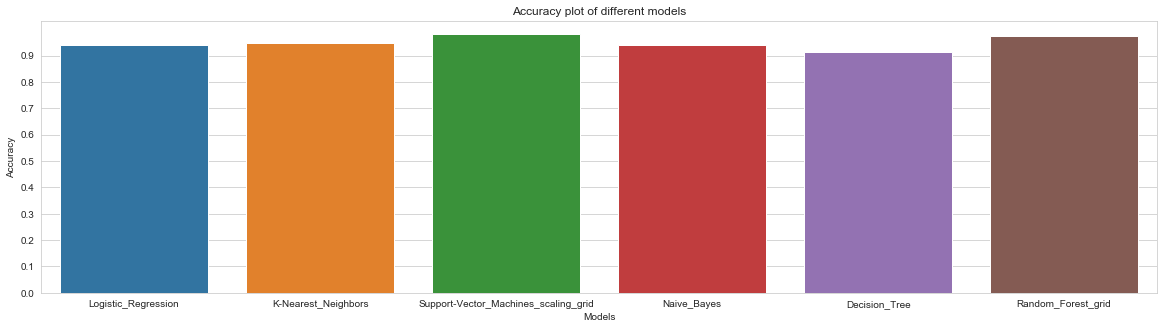

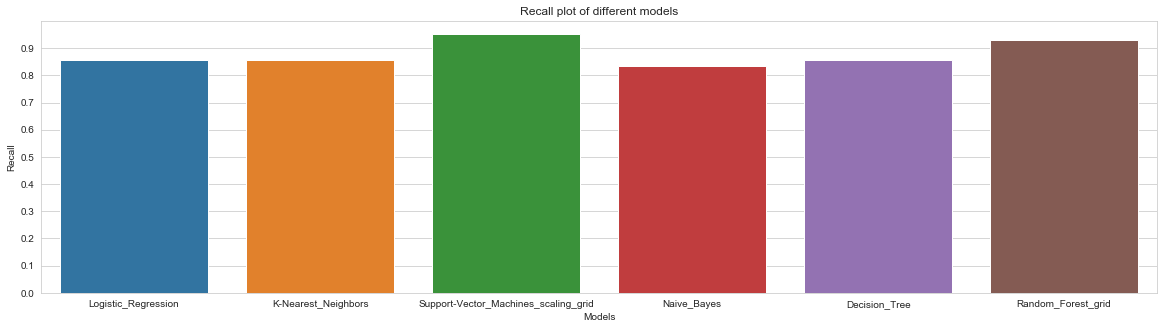

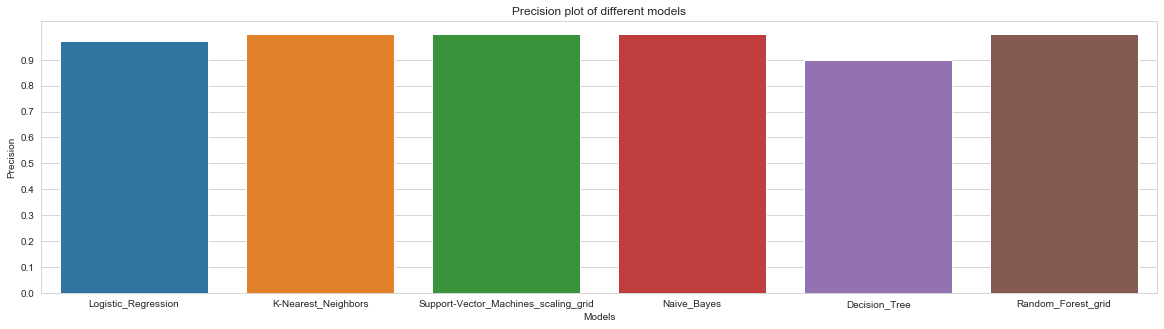

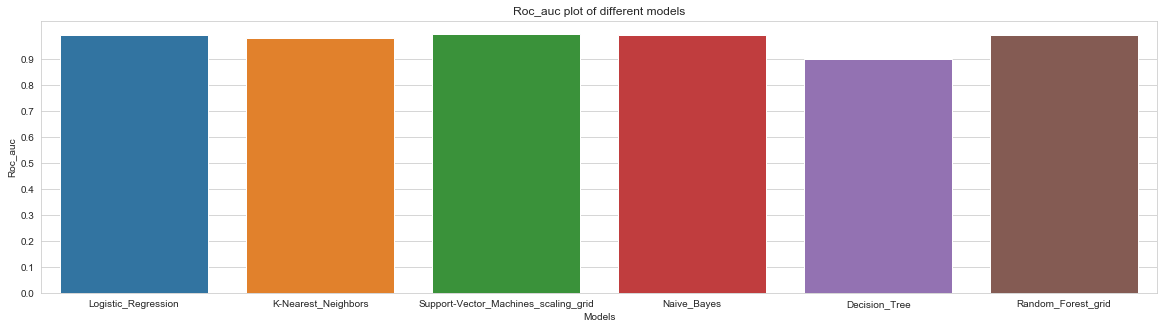

In [29]:
# 3.9) Comparison
def metric_names(metric):
    metric_names = []
    for k, v in metrics.items():
        for k1, v1 in v.items():
            metric_names.append(k1)
        
    metric_names = list(dict.fromkeys(metric_names))
    return metric_names

def metric_values_from_name(metrics, models, name):
    res = []
    for model in models:
        res.append(metrics[model][name])
           
    return res

def plot_metric(metric_name, models, values):
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,5))
    plt.title(metric_name.capitalize()+" plot of different models")
    plt.yticks(np.arange(0,1,0.1))
    plt.ylabel(metric_name.capitalize())
    plt.xlabel("Models")
    #sns.barplot(x=list(metric.keys()), y=list(metric.values()))
    sns.barplot(x=list(models), y=values)
    plt.savefig("../res/plots/"+metric_name+".png")
    plt.show()

# do in a more functional way
print(metrics)
models = metrics.keys()
metric_names = metric_names(metrics)

for name in metric_names:
    plot_metric(name, models, metric_values_from_name(metrics, models, name))

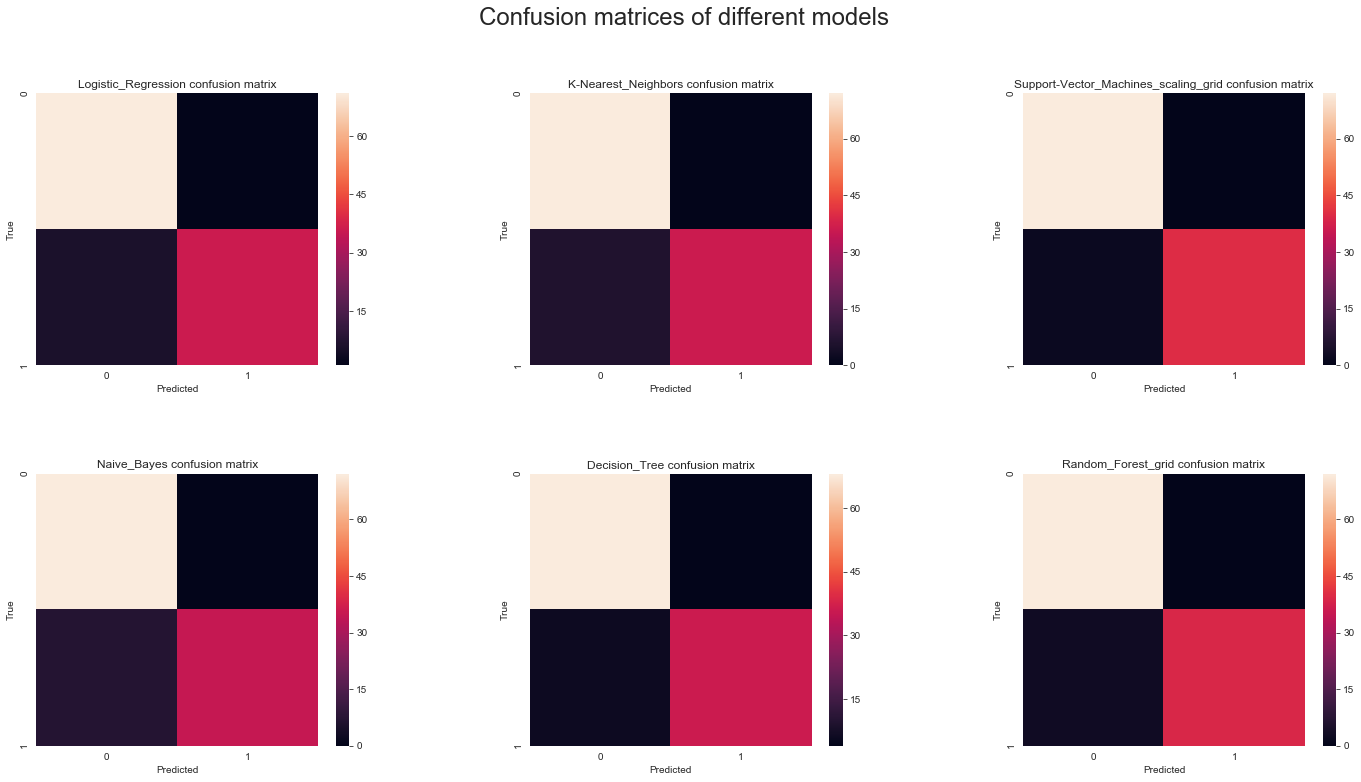

In [30]:
# 3.10) Confusion matrix
def plot_confusion_matrices(cms):
    plt.figure(figsize=(24,12))
    
    plt.suptitle("Confusion matrices of different models", fontsize=24)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    i=1
    for model_name in cms.keys():
        plt.subplot(2,3,i)
        plt.title(model_name+" confusion matrix")
        sns.heatmap(cms[model_name])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        i+=1
    
    plt.savefig("../res/plots/confusion_matrix.png")
    plt.show()

cms = {}
from sklearn.metrics import confusion_matrix

for model in models:
    cms[model] = confusion_matrix(y_test, predictions[model])

plot_confusion_matrices(cms)